Import the libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import matplotlib.pyplot as plt

Import the dataset

In [2]:
dataset = pd.read_csv('winequality-red.csv')
x = dataset.iloc[:, -5].values
y = dataset.iloc[:, -1].values

In [3]:
x

array([0.9978 , 0.9968 , 0.997  , ..., 0.99574, 0.99547, 0.99549])

In [4]:
y

array([5, 5, 5, ..., 6, 5, 6], dtype=int64)

In [5]:
x = x.reshape(-1,1)
x

array([[0.9978 ],
       [0.9968 ],
       [0.997  ],
       ...,
       [0.99574],
       [0.99547],
       [0.99549]])

In [6]:
y = y.reshape(-1, 1)
y

array([[5],
       [5],
       [5],
       ...,
       [6],
       [5],
       [6]], dtype=int64)

Feature Scaling

In [7]:
sc_x = StandardScaler()
x = sc_x.fit_transform(x)
x

array([[ 0.55827446],
       [ 0.02826077],
       [ 0.13426351],
       ...,
       [-0.53355375],
       [-0.67665745],
       [-0.66605717]])

In [8]:
sc_y = StandardScaler()
y = sc_y.fit_transform(y)
y

array([[-0.78782264],
       [-0.78782264],
       [-0.78782264],
       ...,
       [ 0.45084835],
       [-0.78782264],
       [ 0.45084835]])

Splitting into training and test set

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

Training the SVR model

In [11]:
regressor = SVR(kernel='rbf')
regressor.fit(x_train, y_train)

C:\Python38\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

Visualizing the SVR model on training set

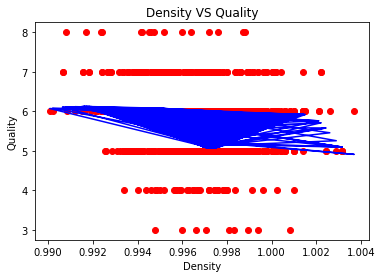

In [12]:
plt.scatter(sc_x.inverse_transform(x_train), sc_y.inverse_transform(y_train), color='red')
plt.plot(sc_x.inverse_transform(x_train), sc_y.inverse_transform(regressor.predict(x_train)), color="blue")
plt.title('Density VS Quality')
plt.xlabel('Density')
plt.ylabel('Quality')
plt.show()

Visualizing the SVR model on test set

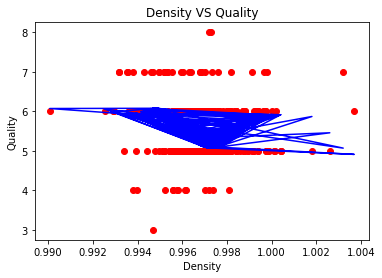

In [13]:
plt.scatter(sc_x.inverse_transform(x_test), sc_y.inverse_transform(y_test), color='red')
plt.plot(sc_x.inverse_transform(x_test), sc_y.inverse_transform(regressor.predict(x_test)), color="blue")
plt.title('Density VS Quality')
plt.xlabel('Density')
plt.ylabel('Quality')
plt.show()